In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv('datasets\churn-bigml-20.csv')
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [3]:
df.shape

(667, 20)

In [4]:
import seaborn as sns

#sns.pairplot(df)

In [5]:
model = LogisticRegression(max_iter=1580)
le = LabelEncoder()

df['International plan'] = le.fit_transform(df['International plan'])
df['Voice mail plan'] = le.fit_transform(df['Voice mail plan'])
df['Churn'] = le.fit_transform(df['Churn'])
df['State'] = le.fit_transform(df['State'])

X = df.drop('Churn', axis=1)
y = df['Churn']

<Axes: >

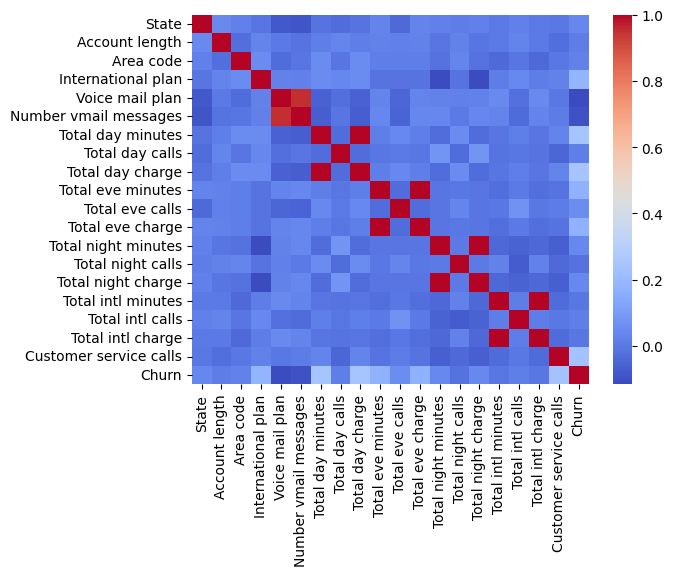

In [6]:
sns.heatmap(df.corr(), cmap='coolwarm')

In [7]:
#After Pre-processing

X.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,18,117,408,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1
1,15,65,415,0,0,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4
2,34,161,415,0,0,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4
3,40,111,415,0,0,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2
4,11,49,510,0,0,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model.fit(X_train, y_train)
print(f"Accuracy :{model.score(X_test, y_test)}")

Accuracy :0.8905472636815921


In [9]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [10]:
import numpy as np

individual_values = np.array([18,117,408,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1]).reshape(1,- 1)  # Select the rows you want to predict
predictions = model.predict(individual_values)
print(predictions)

[0]


c:\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [11]:
model.predict_proba(X_test) 

array([[0.96707203, 0.03292797],
       [0.96080303, 0.03919697],
       [0.93471187, 0.06528813],
       [0.66630954, 0.33369046],
       [0.67402722, 0.32597278],
       [0.96626244, 0.03373756],
       [0.96255959, 0.03744041],
       [0.91412764, 0.08587236],
       [0.84048346, 0.15951654],
       [0.99498264, 0.00501736],
       [0.78172667, 0.21827333],
       [0.94393493, 0.05606507],
       [0.8503402 , 0.1496598 ],
       [0.97745884, 0.02254116],
       [0.9631015 , 0.0368985 ],
       [0.99628937, 0.00371063],
       [0.82309954, 0.17690046],
       [0.97984409, 0.02015591],
       [0.55730758, 0.44269242],
       [0.9817523 , 0.0182477 ],
       [0.33137369, 0.66862631],
       [0.66907177, 0.33092823],
       [0.8975433 , 0.1024567 ],
       [0.4820346 , 0.5179654 ],
       [0.96956726, 0.03043274],
       [0.85279512, 0.14720488],
       [0.9403649 , 0.0596351 ],
       [0.99360996, 0.00639004],
       [0.91731378, 0.08268622],
       [0.98015563, 0.01984437],
       [0.